## IE6511 Homework 2 
Done by: Aloisius Stephen and Yang Xiaozhou

In [425]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

## 1. Homework on Genetic Algorithm

1. A binary string of length 4 <br> <br>

2.  Parent one before crossover: 0010, after crossover: 0010<br>
    Parent two before crossover: 0011, after crossover: 0011<br> <br>
    Parent three before crossover: 0011, after crossover: 1011<br>
    Parent four  before crossover: 1010, after crossover: 0010 <br><br>

3. Pair one children: 0010 and 0011 <br>
   Pair two children: 1011 and 0010 <br> <br>

4. After mutation, <br>
   Pair one children: 0000 and 0001 <br>
   Pair two children: 1001 and 0000 <br> <br>

5. x and f(x) values of children: <br>
    children one, x = 0, f(x) = 0 <br>
    children two, x = 1, f(x) = 1 <br>
    children three, x = 9, f(x) = 6561 <br>
    children four, x = 0, f(x) = 0 <br>

    Total f(x) = 6561+ 1 = 6562

    Probability of being selected: <br>
    children one, p = 0 <br>
    children two, p = 1/6562 <br>
    children three, p = 6561/6562 <br>
    children four, p = 0 <br> <br>

6. Binary strings of parents: <br>
    Parent one: 0110 0010 1001 <br>
    Parent two: 0001 0010 0011 <br>
    
    Children binary strings, x value (Crossover point 3): <br>
    Children one: 0111 0010 0001, x = (7,2,9) <br>
    Children two: 0000 0010 1011, x = (0,2,3) <br>
    
    
    


# Simulated Annealing

## 2. SA Parameter Selection when cost function range = (MaxCost and MinCost) are known
<!--no code-->

a) 
\begin{align}
avg \Delta cost &= 0.25(MaxCost - MinCost) \\
&= 25
\end{align}

\begin{align}
T_0 &= - \frac{avg \Delta cost}{\ln P1} \\
\end{align}

In [426]:
P_1 = 0.4
T_0 = -25/ np.log(P_1)
print("T_0: %.4f" %T_0)

T_0: 27.2839


b)
\begin{align}
T_0 &= - \frac{0.25(MaxCost - MinCost)}{\ln P1} \\
\end{align}

c)
\begin{align}
T_{final} &= - \frac{0.25(MaxCost - MinCost)}{\ln P2} \\
\end{align}

d)
\begin{align}
\alpha &= \left \{- \frac{0.25(MaxCost - MinCost)}{T_0 \ln P2} \right \}^\frac{1}{G} \\
&= \left \{- \frac{25}{ 100 \ln 0.001} \right \}^\frac{1}{200}
\end{align}

In [427]:
alpha = np.power(-25/(100*np.log(0.001)), 1/200)
print("Alpha: %.4f" %alpha)

Alpha: 0.9835


e)
\begin{align}
\alpha &= \left \{- \frac{0.25(MaxCost - MinCost)}{T_0 \ln P2} \right \}^\frac{1}{G\div M} \\
&= \left \{- \frac{25}{ 100 \ln 0.001} \right \}^\frac{1}{200 \div 10} \\
&= \left \{- \frac{25}{ 100 \ln 0.001} \right \}^\frac{1}{20}
\end{align}

In [428]:
alpha = np.power(-25/(100*np.log(0.001)), 1/20)
print("Alpha: %.4f" %alpha)

Alpha: 0.8471


## 3. SA Parameter Selection when you have computed AP cost values (no coding necessary)  
<!--no code-->

In [432]:
S_0 = 1
Avg_Delta_Cost = 1/5 * np.sum([x-40 for x in [60, 50, 65, 75, 45]])
P_1 = 0.9
T_0 = -Avg_Delta_Cost/ np.log(P_1)
print("T_0: %.4f" %T_0)

T_0: 180.3332


In [433]:
Avg_Delta_Cost

19.0

## 4. SA Implementation
<!--CODING-->

In [514]:
# cost function
def cost(S):
    
    cost = np.power(10,9)-(625-np.power(S[0]-25, 2))*(1600-np.power(S[1]-10, 2))*np.sin((S[0])*np.pi/10)*np.sin((S[1])*np.pi/10)
    
    return cost


# neighbor function
def neighbor(S):
    
    neighbor = S
    pos = np.random.randint(0, 2) # randomly pick one of the two decision variables
    nei_value = S[pos]
    while nei_value == S[pos]:
        # randomly generate a neighbor value
        nei_value = np.random.randint(max(S[pos]-25, 0), min(S[pos]+25, 127)+1)
        pass
    neighbor[pos] = nei_value # form the neighbor
    
    return neighbor


# simulated annealing algorithm
def SA(S_initial, T_initial, alpha, beta, M, Max_time):
    
    solution = np.zeros([Max_time,3])

    T = T_initial
    CurS = S_initial
    BestS = CurS
    CurCost = cost(CurS)
    BestCost = CurCost
    time = 0

    while time < Max_time:

        for i in range(0, M):
            NewS = neighbor(CurS)
            NewCost = cost(NewS)
            diff_cost = NewCost - CurCost
            
            if diff_cost < 0:
                CurS = NewS
                CurCost = NewCost
                if NewCost < BestCost:
                    BestS = NewS
                    BestCost = NewCost
            elif np.random.random() < np.exp(-diff_cost/T): 
                CurS = NewS
                CurCost = NewCost
                
            solution[time+i]=time+i+1, CurCost, BestCost
        
        time = time + M
        T = alpha*T
        M = beta*M
        
    solution = pd.DataFrame(solution, columns=['Iteration_Number', 'Current_Cost', 'Best_Cost'])

    return (solution, BestS)

## 5. Running SA: 
### a)

In [497]:
#np.random.seed(100)

beta = 1
G = 1000
M = 1
Max_time = 1100
P_1 = 0.9
P_2 = 0.05
AP = 20


def SAparameter(beta, G, M, Max_time, P_1, P_2, AP):
    
    # generate S1
    start_s = [np.random.randint(0,128), np.random.randint(0,128)]
    AP = AP - 1
    
    # evaluate neighbors of S1
    s_neighbor = pd.DataFrame([[0,0]], columns = ["s1", "s2"], index = range(AP))
    cost_ap = pd.DataFrame([[0]], columns = ["cost"], index = range(AP))
    
    # include start_s itself
    s_neighbor.iloc[0] = start_s
    cost_ap.iloc[0] = cost(start_s)

    for i in range(1, AP):
        s_neighbor.iloc[i] = neighbor(start_s)
        cost_ap.iloc[i] = cost(s_neighbor.iloc[i])
    
    neighbor_cost = s_neighbor.join(cost_ap)
    avg_delta_cost = np.sum((neighbor_cost.cost-min(neighbor_cost.cost)))/(AP-1)
    
    # base on AP parameter search, decide on the starting S
    S_0 = neighbor_cost.sort_values('cost').head(1).values.ravel()[:2]
    
    # calculate algorithm parameters
    T_0 = -avg_delta_cost/np.log(P_1)
    T_2 = -avg_delta_cost/np.log(P_2)
    alpha = np.power(np.log(P_1)/np.log(P_2), 1/G)
    
    param = [T_0,T_2,alpha, avg_delta_cost]
    
    return param

In [498]:
param = SAparameter(beta, G, M, Max_time, P_1, P_2, AP)
print('T_0: %.5f' %param[0])
print('T_2: %.5f' %param[1])
print('alpha: %.5f' %param[2])
print('Avg_Delta_Cost: %.5f' %param[3])

T_0: 262753099.61151
T_2: 9241080.15598
alpha: 0.99666
Avg_Delta_Cost: 27683802.06576


### b)

In [499]:
T_0 = param[0]
alpha = param[2]

Z = [[np.random.randint(0,128), np.random.randint(0,128)] for i in range(30)]

In [500]:
import time
cpu_time = []

start_time = time.time()
sa_combine = SA(Z[0], T_0, alpha, beta, M, Max_time)[0]
cpu_time.append(time.time() - start_time)

for i in range(1,30):
    start_time = time.time()
    sa_combine = sa_combine.append(SA(Z[i], T_0, alpha, beta, M, Max_time)[0])
    cpu_time.append(time.time() - start_time)

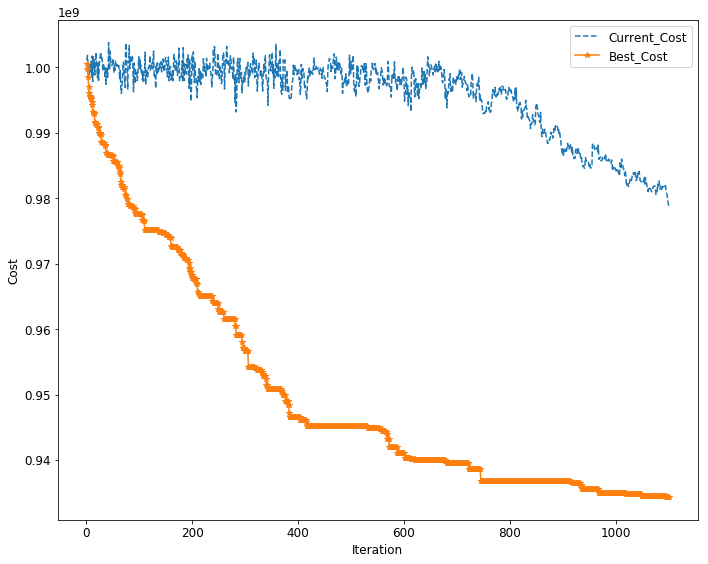

In [524]:
#average of Current_Cost and Best_Cost plot
plt.figure(figsize=[10,8])
plt.plot(sa_combine.groupby('Iteration_Number').mean().Current_Cost, '--')
plt.plot(sa_combine.groupby('Iteration_Number').mean().Best_Cost, '*-')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(['Current_Cost','Best_Cost'])
plt.tight_layout()

In [525]:
print('Mean at 1000th iteration: \n')
print(sa_combine.groupby('Iteration_Number').mean().loc[1000])

Mean at 1000th iteration: 

Current_Cost    9.842307e+08
Best_Cost       9.348904e+08
Name: 1000.0, dtype: float64


In [526]:
print('Std at 1000th iteration: \n')
print(sa_combine.groupby('Iteration_Number').std().loc[1000])

Std at 1000th iteration: 

Current_Cost    2.984165e+07
Best_Cost       1.884423e+07
Name: 1000.0, dtype: float64


In [527]:
# Average CPU time
print("Average CPU Time: %.5fs" %np.mean(cpu_time))

Average CPU Time: 0.03424s


### c)

In [529]:
#np.random.seed(100)

beta = 1
G = 1000
M = 1
Max_time = 1100
P_1 = 0.7
P_2 = 0.05
AP = 20

# calculate algorithm parameters
# param[3] is to use the same avg_delta_cost from part a
T_0 = -param[3]/np.log(P_1)
alpha = np.power(np.log(P_1)/np.log(P_2), 1/G)
print('T_0: %.5f' %T_0)
print('alpha: %.5f' %alpha)

T_0: 77616335.36702
alpha: 0.99787


In [530]:
sa_combine_part_c = SA(Z[0], T_0, alpha, beta, M, Max_time)[0]

for i in range(1,30):
    sa_combine_part_c = sa_combine_part_c.append(SA(Z[i], T_0, alpha, beta, M, Max_time)[0])

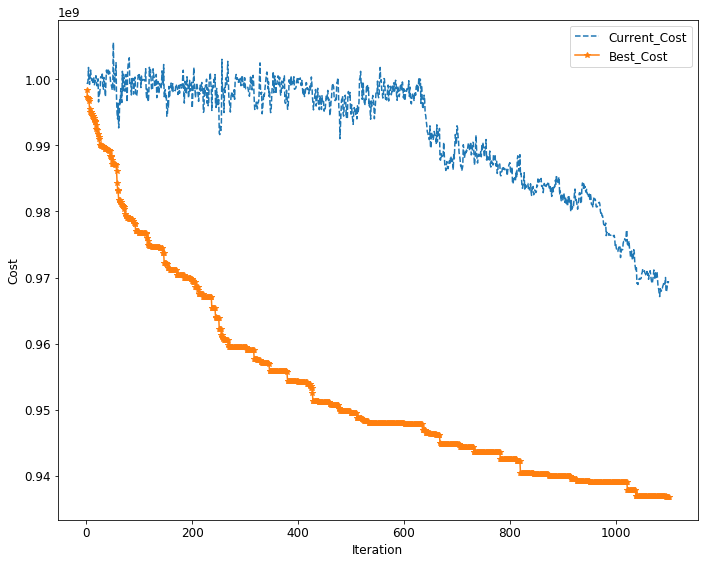

In [531]:
#average of Current_Cost and Best_Cost plot
plt.figure(figsize=[10,8])
plt.plot(sa_combine_part_c.groupby('Iteration_Number').mean().Current_Cost, '--')
plt.plot(sa_combine_part_c.groupby('Iteration_Number').mean().Best_Cost, '*-')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(['Current_Cost','Best_Cost'])
plt.tight_layout()

In [532]:
# Compare the mean at 1100th iteration for two P_1 values
print("When P_1 = 0.9:    %.3f" %sa_combine.groupby('Iteration_Number').mean().loc[1100]['Best_Cost'])
print("When P_1 = 0.7:    %.3f" %sa_combine_part_c.groupby('Iteration_Number').mean().loc[1100]['Best_Cost'])

When P_1 = 0.9:    934332873.477
When P_1 = 0.7:    936808033.894


### d)

There aren't much improvement on Best Cost for from 1000th to 1100th iteration:  

In [533]:
print('When P1 = 0.9')
print("1000th Iteration:    %.3f" %sa_combine.groupby('Iteration_Number').mean().loc[1000]['Best_Cost'])
print("1100th Iteration:    %.3f" %sa_combine.groupby('Iteration_Number').mean().loc[1100]['Best_Cost'])
print('When P1 = 0.7')
print("1000th Iteration:    %.3f" %sa_combine_part_c.groupby('Iteration_Number').mean().loc[1000]['Best_Cost'])
print("1100th Iteration:    %.3f" %sa_combine_part_c.groupby('Iteration_Number').mean().loc[1100]['Best_Cost'])

When P1 = 0.9
1000th Iteration:    934890358.799
1100th Iteration:    934332873.477
When P1 = 0.7
1000th Iteration:    939051824.094
1100th Iteration:    936808033.894
